<a href="https://colab.research.google.com/github/EliGorniak/Olympics_Games_DataAnalysis_MachineLearning/blob/main/Analisando_os_JOGOS_OL%C3%8DMPICOS_utilizando_CI%C3%8ANCIA_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

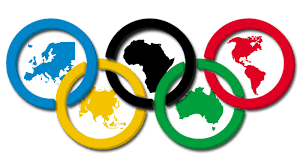


# **Analisando os JOGOS OLÍMPICOS utilizando CIÊNCIA DE DADOS**
Este notebook foi desenvolvido durante a aula online do Victor Barros no canal do Youtube: https://www.youtube.com/watch?v=JI_ATSWmi-M 

# Etapa 1 - Entendimento do Problema 

## Vamos analisar 120 anos de dados históricos dos Jogos Olímpicos, começando nos Jogos de Atenas em 1896 indo até o Rio de Janeiro no ano de 2016, utilizando Ciência de Dados.

# Etapa 2: Coleta de Dados

#### Você pode baixar esse conjunto de dados no site: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

# Etapa 3: Análise, Interpretação e Visualização dos Dados


### **Importando as bibliotecas**

In [65]:
# Biblioteca para manipulação dos dados
import pandas as pd
pd.options.mode.chained_assignment = None

# Biblioteca para visualização dos dados
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para machine learning

In [2]:
df_atleta = pd.read_csv("athlete_events.csv")

In [7]:
df_atleta.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df_atleta.tail(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [12]:
# o método .info() é SUPER PODEROSO pois ele mostra detalhes importantes do dataset
df_atleta.info()
# observar o RangeIndex a quantidade de entries
# observar linha a linha das features (colunas) onde há dados faltantes, talvez seja necessário aplicar feature engineering para corrigir os problemas
# Dtype object é uma junção de string e numbers, ex R$ 180.00
# Age como float64, não é possível fazer feature engineering se na feature há dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### **Dicionário de dados:**

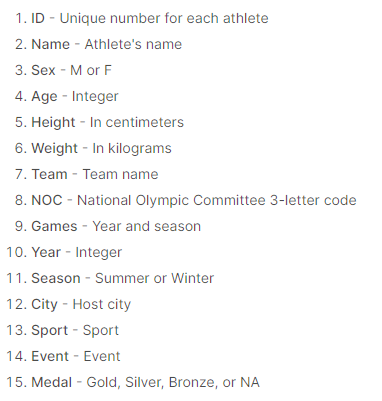

In [22]:
# Renomeando as colunas:
# inplace=True vai manter a mudança permanentemente no df
df_atleta.rename(columns={"ID": "id_atleta", "Name": 'nome_atleta', "Sex": "sexo_atleta", 'Age': 'idade_atleta', 'Height': 'altura_atleta', 'Weight': 'peso_atleta', 'Team': 'equipe', 'NOC': 'noc', 'Games': 'ano_temporada', 'Year': 'ano', "Season": 'temporada', 'City': 'cidade_sede', 'Sport': 'modalidade_esportiva', 'Event': 'evento', 'Medal': 'medalha'}, inplace=True)

In [24]:
df_atleta.head(5)

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [25]:
# Criando um novo dataframe SEM os JOGOS DE INVERNO
df_atleta['temporada'].nunique() # mostra a quantidade de únicos que temos na coluna

2

In [26]:
df_atleta['temporada'].unique() # mostra quais os valores únicos que temos na coluna

array(['Summer', 'Winter'], dtype=object)

In [27]:
# filtrando na coluna temporada para armazenar apenas os rows com 'Summer', excluindo os 'Winter'
df_atleta = df_atleta[df_atleta['temporada'] == 'Summer']

In [28]:
df_atleta['temporada'].unique()

array(['Summer'], dtype=object)

### **Informações Estatísticas**

In [33]:
df_atleta.describe().round(3) # só para melhorar a visualização com 3 casas decimais
# o describe() já ajuda a ver se há discrepâncias nos valores, por exemplo, a idade mínima foi de 10 anos? e a idade máxima de um atleta foi de 97 anos? Dados faltantes? Outliers?

,id_atleta,idade_atleta,altura_atleta,peso_atleta,ano
count,222552.000,213363.000,170695.000,168698.000,222552.000
mean,67998.926,25.674,175.516,70.689,1976.317
std,39139.038,6.700,10.915,14.804,30.943
min,1.000,10.000,127.000,25.000,1896.000
25%,34000.750,21.000,168.000,60.000,1956.000
50%,68302.500,24.000,175.000,70.000,1984.000
75%,101881.000,28.000,183.000,79.000,2000.000
max,135568.000,97.000,226.000,214.000,2016.000


In [31]:
df_atleta.describe(include='O') # include='O' vai mostrar todos os dados que são do tipo OBJECT

,name_atleta,sexo_atleta,equipe,noc,ano_temporada,temporada,cidade_sede,modalidade_esportiva,evento,medalha
count,222552,222552,222552,222552,222552,222552,222552,222552,222552,34088
unique,116122,2,1157,230,29,1,23,52,651,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,163109,14526,15064,13821,222552,22426,38624,5733,11459


### **Dados Faltantes**

In [36]:
df_atleta.isnull().sum() # vai acessar o df e detectar os valores faltantes
# o método .sum() vai resumir a quantidade de dados faltantes POR FEATURE

id_atleta                    0
name_atleta                  0
sexo_atleta                  0
idade_atleta              9189
altura_atleta            51857
peso_atleta              53854
equipe                       0
noc                          0
ano_temporada                0
ano                          0
temporada                    0
cidade_sede                  0
modalidade_esportiva         0
evento                       0
medalha                 188464
dtype: int64

In [39]:
df_atleta.isnull().sum().sort_values(ascending=False) # False vai trazer em ordem DECRESCENTE

medalha                 188464
peso_atleta              53854
altura_atleta            51857
idade_atleta              9189
evento                       0
modalidade_esportiva         0
cidade_sede                  0
temporada                    0
ano                          0
ano_temporada                0
noc                          0
equipe                       0
sexo_atleta                  0
name_atleta                  0
id_atleta                    0
dtype: int64

**Para visualizar os valores faltantes, é possível utilizar a biblioteca MISSINGNO**

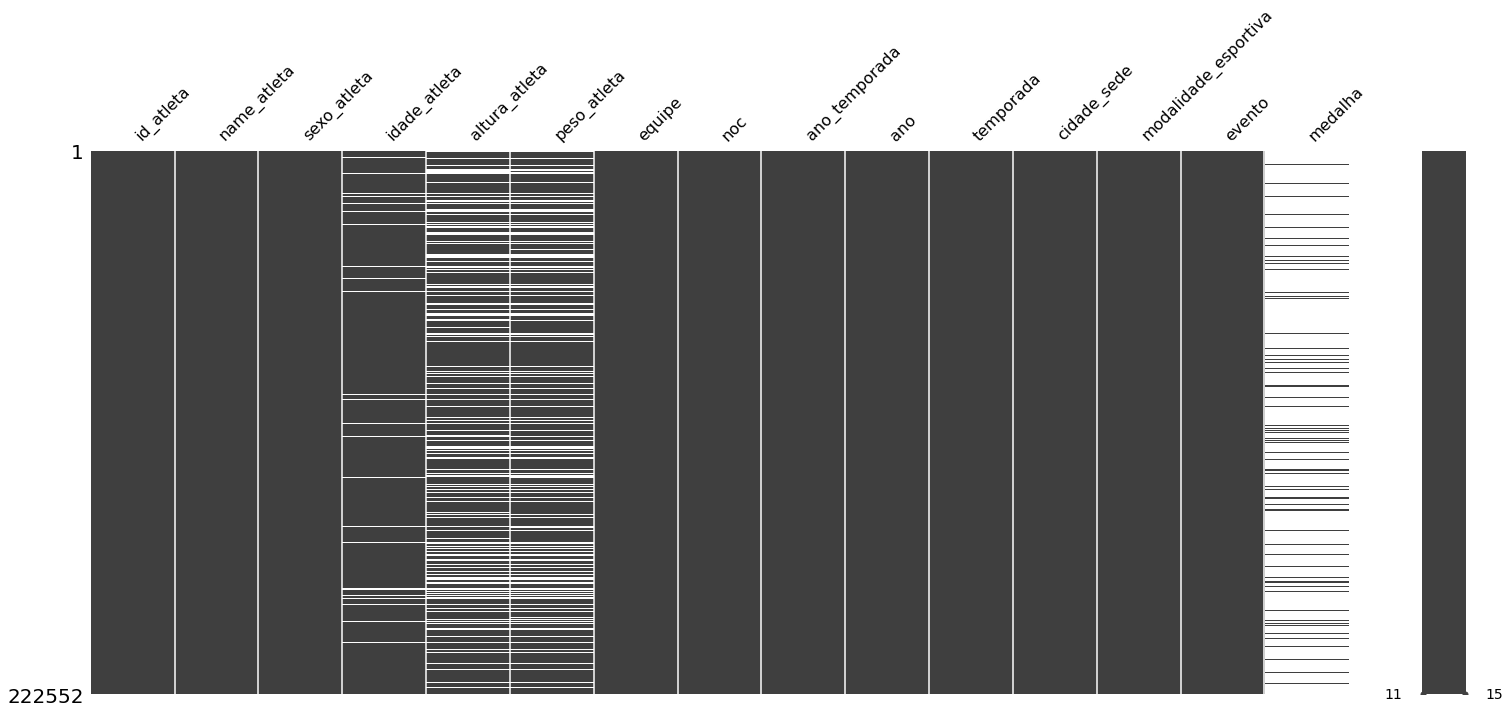

In [48]:
# esse método .matrix() auxilia a visualizar na distribuição do dataframe os espaços em branco para visualizar os dados faltantes
missingno.matrix(df_atleta, figsize=(25,10));

**Avaliando se temos dados DUPLICADOS**

In [49]:
df_atleta[df_atleta.duplicated()]

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [50]:
df_atleta.shape

(222552, 15)

In [54]:
df_atleta.drop_duplicates(inplace=True)

In [55]:
df_atleta[df_atleta.duplicated()] #retornou apenas o nome das colunas, significa que não há duplicatas

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha


In [56]:
df_atleta.shape

(221167, 15)

### **Analisando as Features - realizando alterações para uso na etapa de machine learning**

In [58]:
df_atleta.head()

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


### **id_atleta - identificação única de cada atleta**


In [60]:
df_atleta['name_atleta'].nunique()

116122

### **sexo_atleta**


In [61]:
df_atleta['sexo_atleta'].nunique()

2

In [62]:
df_atleta['sexo_atleta'].unique()

array(['M', 'F'], dtype=object)

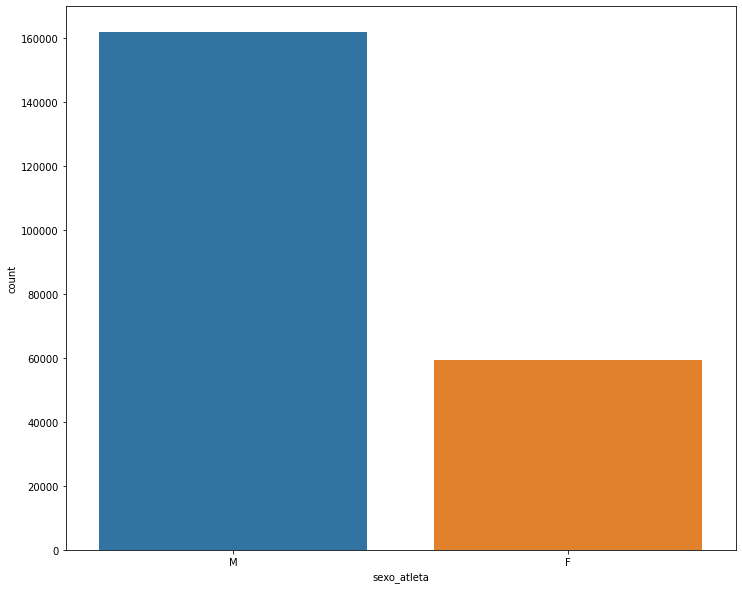

In [66]:
# visualizando a quantidade de M e F usando Matplotlib e Seaborn
plt.figure(figsize=(12,10))
sns.countplot(x = 'sexo_atleta', data=df_atleta)
plt.show()

In [68]:
# detalhando a quantidade por M e F
df_atleta['sexo_atleta'].value_counts()

M    161868
F     59299
Name: sexo_atleta, dtype: int64

### **idade_atleta**


In [70]:
df_atleta['idade_atleta'].nunique()

74

In [74]:
df_atleta['idade_atleta'].unique()

array([24., 23., 34., 18., 26., 31., 30., 22., 28., 32., 54., 27., 43.,
       47., 21., 25., 20., 33., 41., 45., 49., 53., 57., nan, 19., 29.,
       38., 35., 16., 37., 42., 46., 40., 15., 36., 17., 14., 39., 48.,
       52., 55., 50., 44., 71., 63., 51., 58., 60., 75., 65., 13., 56.,
       64., 68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73.,
       66., 76., 88., 11., 96., 80., 10., 81., 77., 97.])

In [72]:
df_atleta.describe()

,id_atleta,idade_atleta,altura_atleta,peso_atleta,ano
count,221167.000000,212137.000000,170667.000000,168661.000000,221167.000000
mean,68016.867403,25.549367,175.515560,70.688298,1976.602486
std,39144.711847,6.434035,10.914843,14.805242,30.820855
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34011.500000,21.000000,168.000000,60.000000,1960.000000
50%,68342.000000,24.000000,175.000000,70.000000,1984.000000
75%,101904.500000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [76]:
df_atleta['idade_atleta'].min()

10.0

In [77]:
df_atleta['idade_atleta'].max()

97.0

In [88]:
df_atleta[df_atleta['idade_atleta'] == 10.0]

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [78]:
df_atleta[df_atleta['idade_atleta'] == 97.0]

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [79]:
df_atleta['idade_atleta'].sort_values(ascending=False)

257054    97.0
98118     96.0
60861     88.0
9371      84.0
236912    81.0
          ... 
270679     NaN
270774     NaN
270793     NaN
270804     NaN
270805     NaN
Name: idade_atleta, Length: 221167, dtype: float64

In [84]:
df_atleta[df_atleta['idade_atleta'] == 81.0]

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN


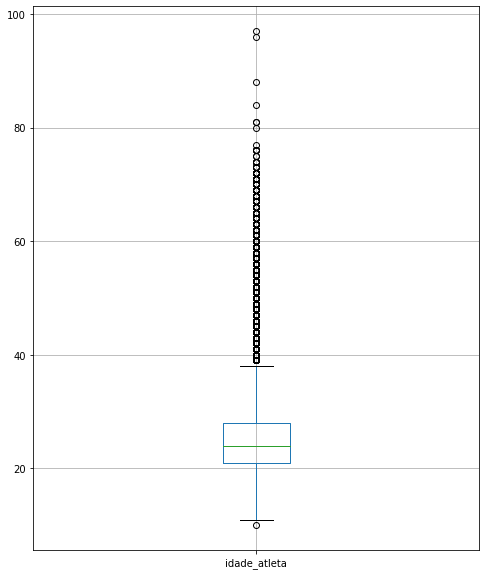

In [87]:
plt.figure(figsize=(8,10))
df_atleta.boxplot('idade_atleta')
plt.show()

In [92]:
df_atleta['idade_atleta'].describe()

count    212137.000000
mean         25.549367
std           6.434035
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: idade_atleta, dtype: float64

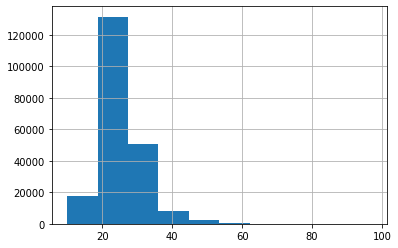

In [93]:
df_atleta['idade_atleta'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição da Idade')

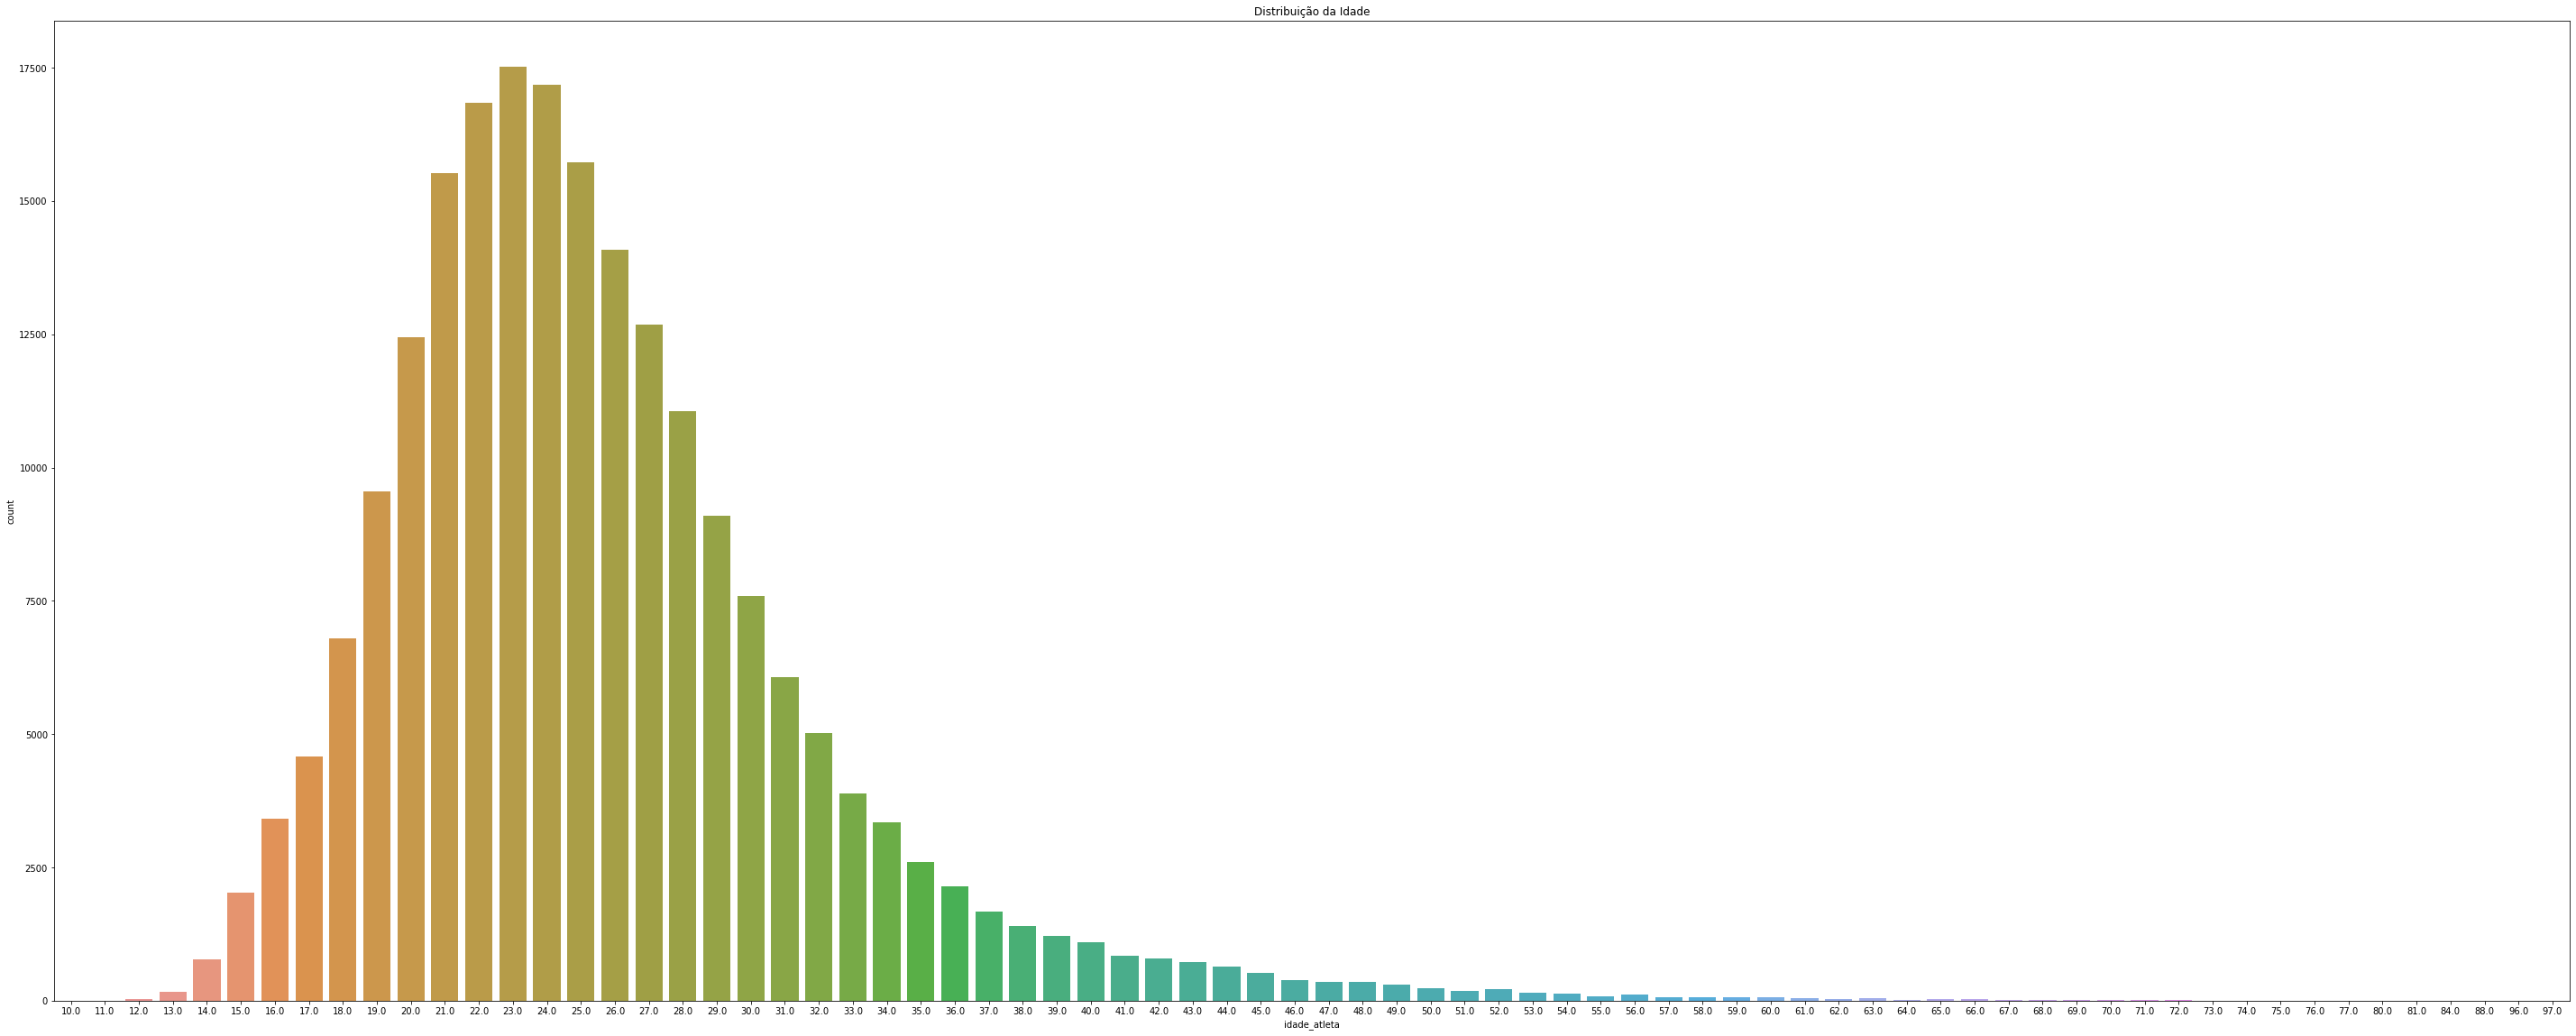

In [99]:
plt.figure(figsize=(50,20))
plt.tight_layout()
sns.countplot(df_atleta['idade_atleta'])
plt.title('Distribuição da Idade')

### **altura_atleta**


In [100]:
df_atleta['altura_atleta'].nunique()

95

In [103]:
df_atleta['altura_atleta'].min()

127.0

In [104]:
df_atleta['altura_atleta'].max()

226.0

In [105]:
df_atleta['altura_atleta'].describe()

count    170667.000000
mean        175.515560
std          10.914843
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: altura_atleta, dtype: float64

In [107]:
df_atleta[df_atleta['altura_atleta'] == 226.0]

,id_atleta,name_atleta,sexo_atleta,idade_atleta,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [110]:
df_atleta_acima200 = df_atleta[df_atleta['altura_atleta'] >= 200.0]

In [111]:
df_atleta_acima200['modalidade_esportiva'].unique()

array(['Volleyball', 'Basketball', 'Rowing', 'Judo', 'Swimming',
       'Taekwondo', 'Athletics', 'Handball', 'Beach Volleyball', 'Tennis',
       'Wrestling', 'Water Polo', 'Sailing', 'Football', 'Canoeing',
       'Cycling', 'Boxing', 'Shooting', 'Weightlifting', 'Fencing',
       'Badminton', 'Hockey', 'Baseball'], dtype=object)

### **peso_atleta**


### **equipe_atleta**


### **NOC**


### **ano_temporada**


In [89]:
df_atleta['ano'].sort_values(ascending=False)

271110    2016
73881     2016
73829     2016
73777     2016
231263    2016
          ... 
214330    1896
234444    1896
198470    1896
198471    1896
48644     1896
Name: ano, Length: 221167, dtype: int64